In [2]:
from utils import *
import json

with open('notebook_settings.json', 'r') as f:
    notebook_settings = json.load(f)
    
seed = 12345678910
level = 'WARN' #for the logger

#create dict of VM and input parameters
params = {
    'vm': {'seed': seed, 'runs': 1, 'ticks': 3, 'level': level},
    'config': {'simudyne.core.export-path': 'Output_{0}'.format(seed)},
    'input': {  "nmDurationPensionFunds": 1,
                "nmValuePensionFunds": 1,
                "timeStep": 1,
                "driftShortTerm": 0.02,
                "volatilityShortTerm": 0.001
             },
    'notebook_settings' : notebook_settings
}

In [3]:
res, run_ids, dataset_ = run_sdk(params, notebook_settings['maven_repo'], java_cmd=notebook_settings['java_cmd'])
# OK so it seems your thing doesnt work
# fortunately that isnt going to stop me anymore
# because i dont care i dont care i dont care


ValueError: ('{0} not supported.', 'Linux')

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
output_dir = "/home/sophie/Documents/uni/project/git_folder/java_model/json_files/"
run_seed = "Multirun-12e93249-81bd-4dba-956d-5b8fed5cf4e3"

Generate Aggregate Pension Fund Data

In [37]:
folder_name = "Simulation_Agent_PensionFund"
absolute_path = output_dir + run_seed + "/" + folder_name
directory = os.fsencode(absolute_path)
print(directory)
dfs = []
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".parquet") or filename.endswith(".py"): 
        df = pd.read_parquet(absolute_path + "/" + filename)
        df["Run_no"] = [filename ] * len(df.index)
        dfs.append(df)

pf_df = pd.concat(dfs)
print(pf_df.head())

# Now I want to:
# 1. split by id1 and id2
# report agent type from java model so i can split on the string instead for nicer code
# 2. average the cashVal at each tick
# 3. plot cashVal against tick for each strategy




b'/home/sophie/Documents/uni/project/git_folder/java_model/json_files/Multirun-12e93249-81bd-4dba-956d-5b8fed5cf4e3/Simulation_Agent_PensionFund'
   cashVal  currentLiabilityVal  currentValue  _id  tick               time   
0   3000.0             0.000000      0.000000    0     0  2018-01-01T00:00Z  \
1   3000.0             0.000000      0.000000    1     0  2018-01-01T00:00Z   
2      0.0          3057.298790   3000.000000    0     1  2018-02-01T00:00Z   
3      0.0          3057.298790   3000.000000    1     1  2018-02-01T00:00Z   
4      0.0          3119.202985   2898.234362    0     2  2018-03-01T00:00Z   

                           Run_no  
0  strategy_comp000000004.parquet  
1  strategy_comp000000004.parquet  
2  strategy_comp000000004.parquet  
3  strategy_comp000000004.parquet  
4  strategy_comp000000004.parquet  


           cashVal              currentLiabilityVal              currentValue   
_id              0            1                   0            1            0   
tick                                                                            
0     3.000000e+03  3000.000000            0.000000     0.000000     0.000000  \
1     1.050466e-12     0.000000         3059.918211  3059.918211  3000.000000   
2     6.609518e+00     3.654819         3120.905877  3120.905877  3016.950964   
3     7.356382e+00     4.468567         3183.396945  3183.396945  3027.715757   
4     6.820643e+00     4.510234         3247.294844  3247.294844  3048.976255   

                   
_id             1  
tick               
0        0.000000  
1     3000.000000  
2     3028.915866  
3     3051.982938  
4     3083.217999  


<Axes: xlabel='tick'>

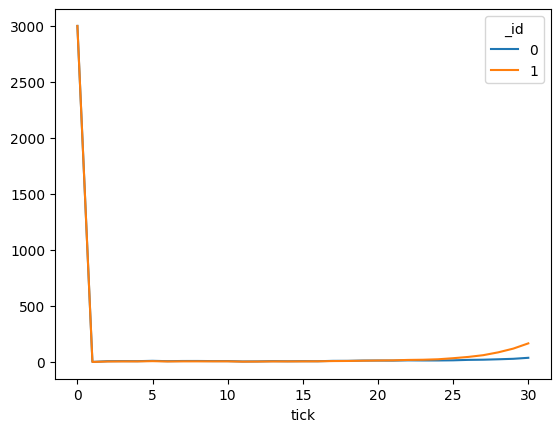

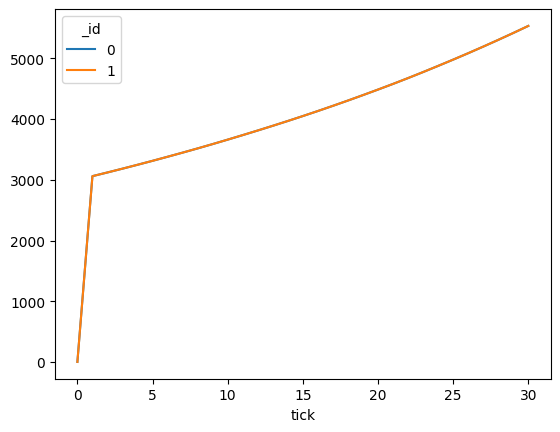

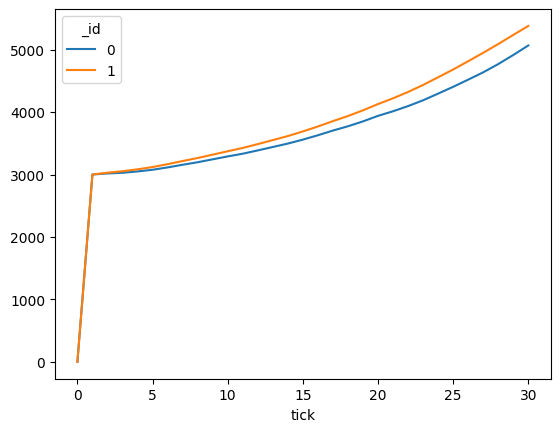

In [38]:
grouped_pf = pf_df.groupby(["_id", "tick"])[["cashVal", "currentLiabilityVal", "currentValue"]].mean().unstack(level=0)
print(grouped_pf.head())
grouped_pf.plot(y="cashVal",legend=True)
grouped_pf.plot(y="currentLiabilityVal",legend=True)
grouped_pf.plot(y="currentValue",legend=True)
# More graphs - number of times that it ends up being unable to pay
# Add duration to reported statistics
# Send the inflation rates crazier

Kinda as expected - the value matching one has a higher value and ends up with more cash. Nothing that exciting.

Create Bond Issuer Data

In [40]:
folder_name = "Simulation_Agent_BondIssuer"
absolute_path = output_dir + run_seed + "/" + folder_name
directory = os.fsencode(absolute_path)
print(directory)
dfs = []
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith(".parquet") or filename.endswith(".py"): 
        df = pd.read_parquet(absolute_path + "/" + filename)
        df["Run_no"] = [filename ] * len(df.index)
        dfs.append(df)

bi_df = pd.concat(dfs)
print(bi_df.head())

b'/home/sophie/Documents/uni/project/git_folder/java_model/json_files/Multirun-12e93249-81bd-4dba-956d-5b8fed5cf4e3/Simulation_Agent_BondIssuer'
   inflationRate  interestRate  totalMoney  _id  tick               time   
0       0.020000      0.020000         0.0    2     0  2018-01-01T00:00Z  \
1       0.019100      0.020694      6000.0    2     1  2018-02-01T00:00Z   
2       0.020248      0.022642      6000.0    2     2  2018-03-01T00:00Z   
3       0.019448      0.021839      6000.0    2     3  2018-04-01T00:00Z   
4       0.020078      0.022073      6000.0    2     4  2018-05-01T00:00Z   

                           Run_no  
0  strategy_comp000000004.parquet  
1  strategy_comp000000004.parquet  
2  strategy_comp000000004.parquet  
3  strategy_comp000000004.parquet  
4  strategy_comp000000004.parquet  


      inflationRate  interestRate
tick                             
0          0.020000      0.020000
1          0.019973      0.020539
2          0.019930      0.021002
3          0.020021      0.021640
4          0.020068      0.022212


<Axes: >

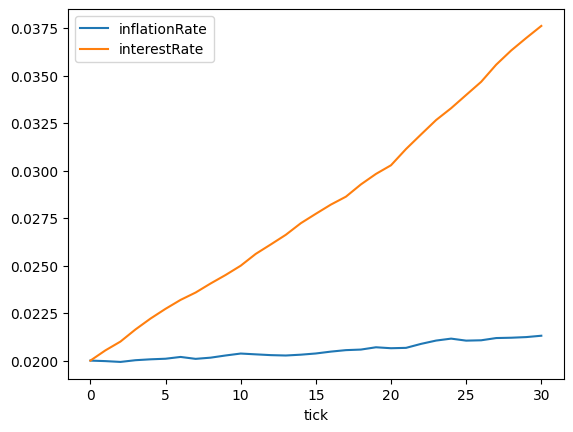

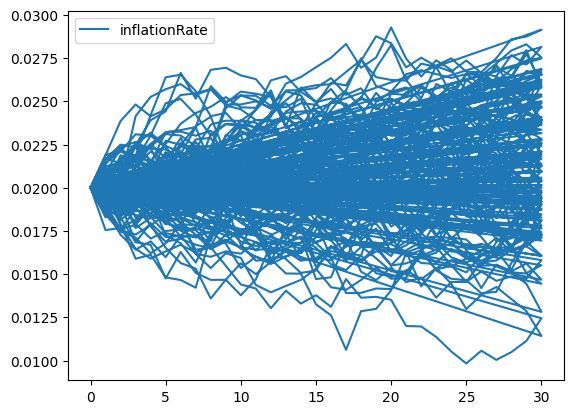

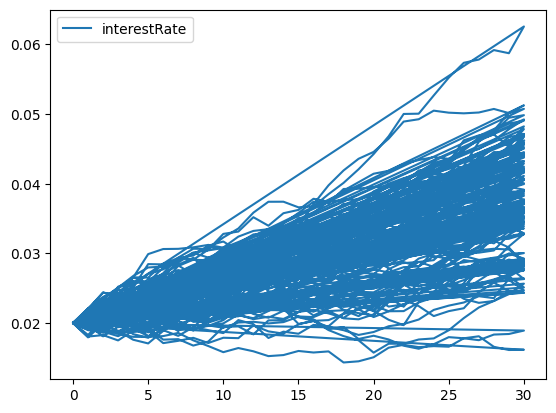

In [42]:
grouped_bi = bi_df.groupby(["tick"])[["inflationRate", "interestRate"]].mean()
print(grouped_bi.head())
grouped_bi.plot(legend=True)

bi_df.plot(y="inflationRate")
bi_df.plot(y="interestRate")


Now I should send interest rates up a bunch and see what happens to the performance. Then I should send them down again and see what happens then.